In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.DataFrame(california.data,columns=california.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df.shape

(20640, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [11]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64

In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['AveBedrms'].fillna(df['AveBedrms'].median(),inplace=True)

In [16]:
for i in df.iloc[:,2:7]:
    df[i]=df[i].astype('int')

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6,1,322,2,37,-122.23
1,8.3014,21.0,6,0,2401,2,37,-122.22
2,7.2574,52.0,8,1,496,2,37,-122.24
3,5.6431,52.0,5,1,558,2,37,-122.25
4,3.8462,52.0,6,1,565,2,37,-122.25


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
HouseAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
AveRooms,20640.0,4.933818,2.489414,0.0000,4.0000,5.0000,6.00000,141.0000
AveBedrms,20640.0,0.815940,0.609920,0.0000,1.0000,1.0000,1.00000,34.0000
Population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
AveOccup,20640.0,2.565213,10.391457,0.0000,2.0000,2.0000,3.00000,1243.0000
Latitude,20640.0,35.107607,2.141580,32.0000,33.0000,34.0000,37.00000,41.0000
Longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100


In [19]:
Numerical=df.select_dtypes(include=[np.number]).columns

In [20]:
print(Numerical)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


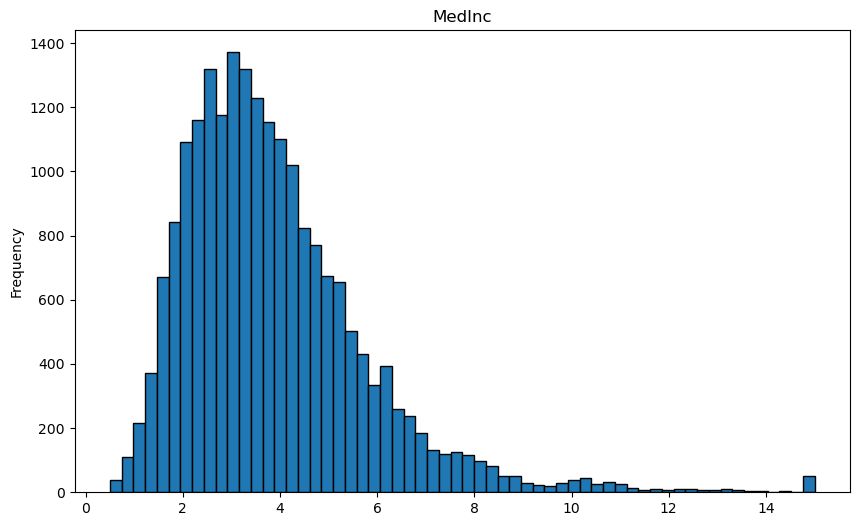

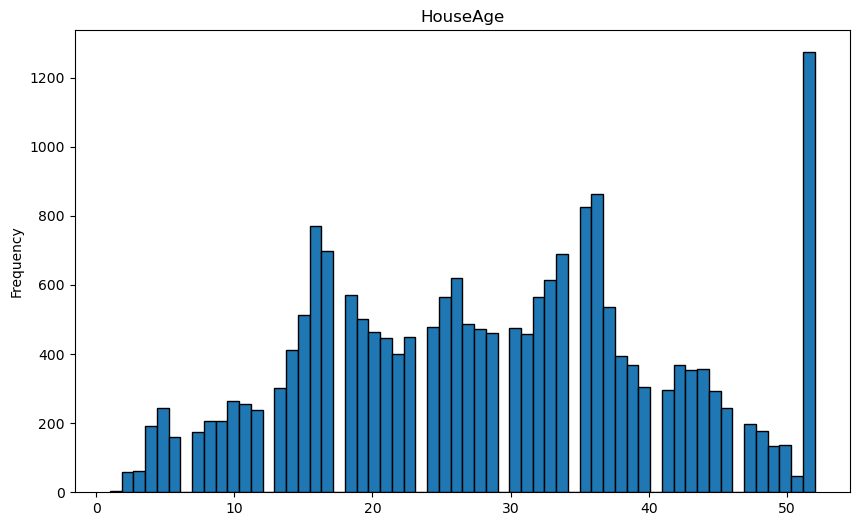

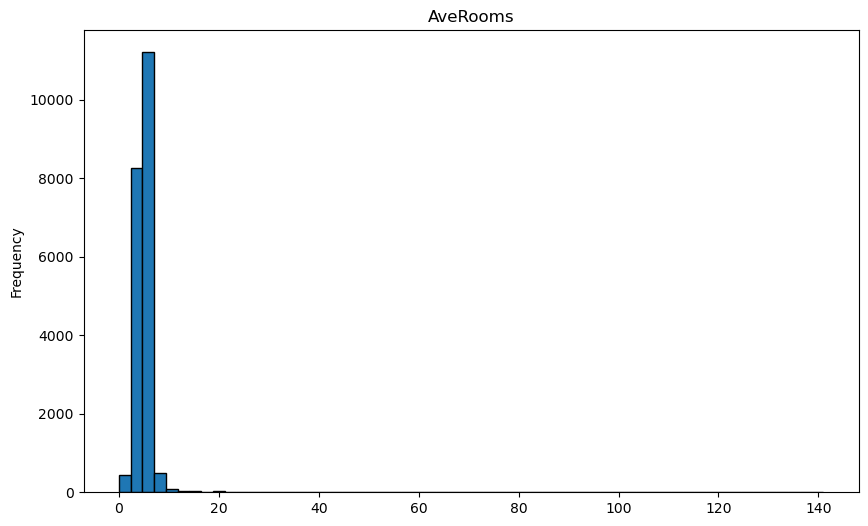

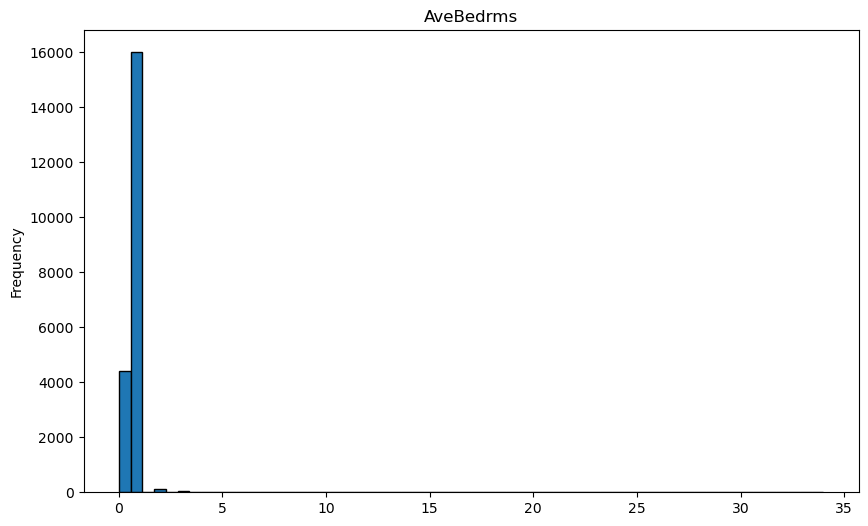

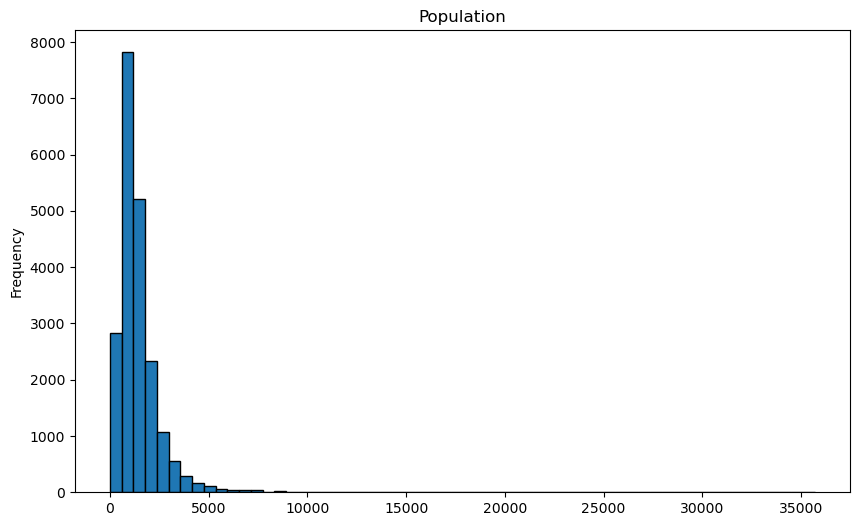

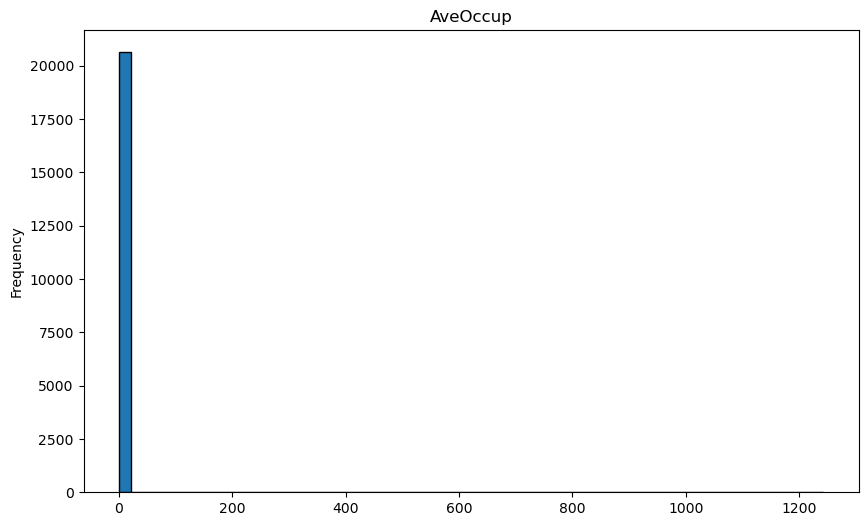

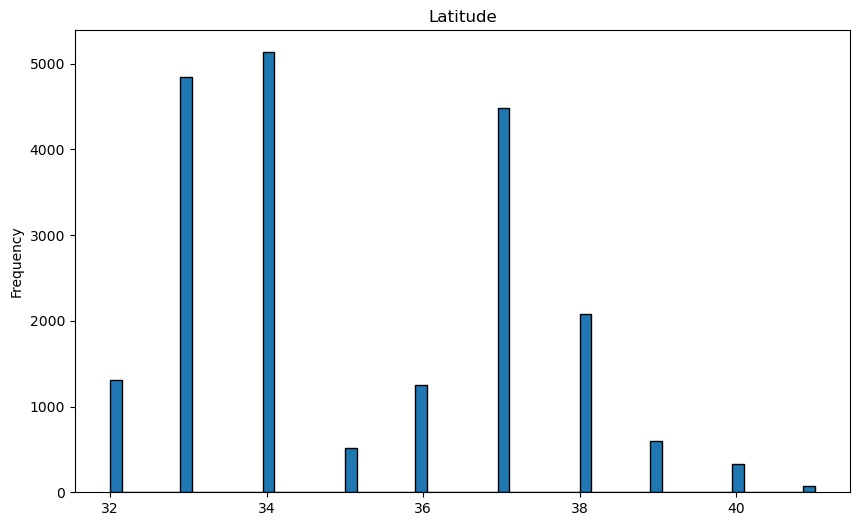

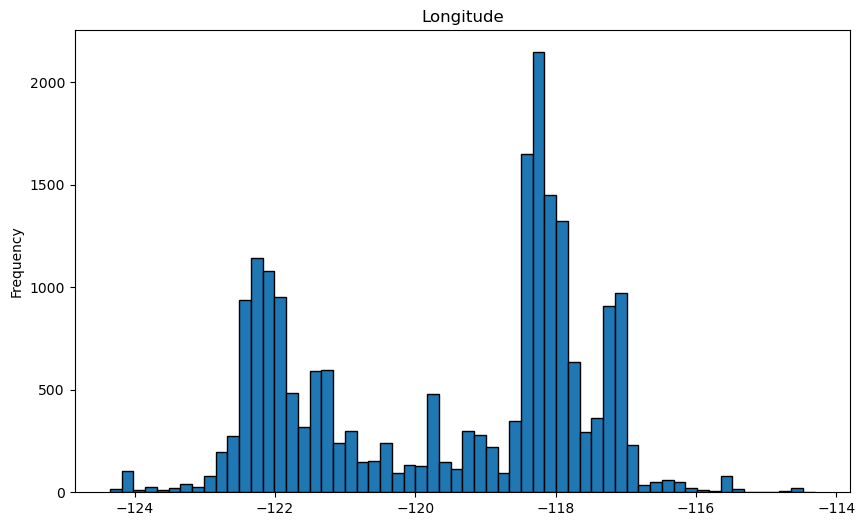

In [21]:
for col in Numerical:
    plt.figure(figsize=(10,6))
    df[col].plot(kind='hist',title=col,bins=60,edgecolor='black')
    plt.ylabel('Frequency')
    plt.show()

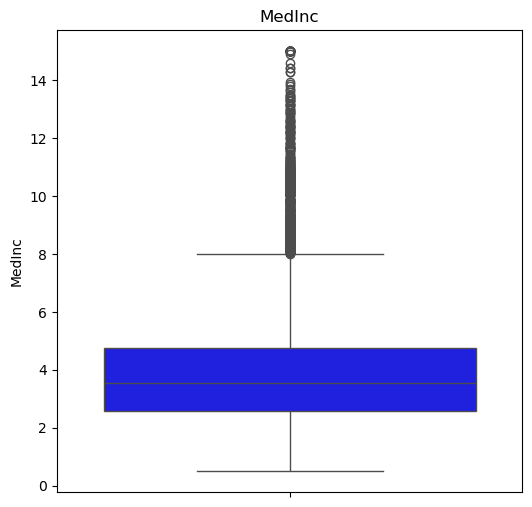

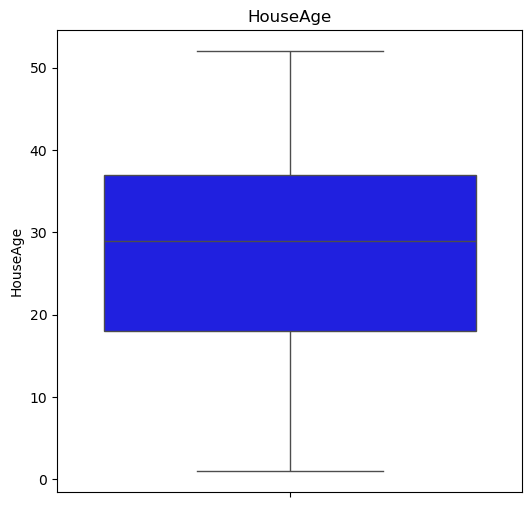

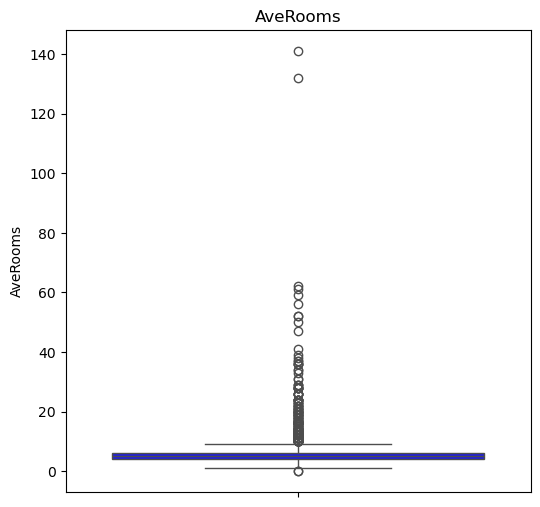

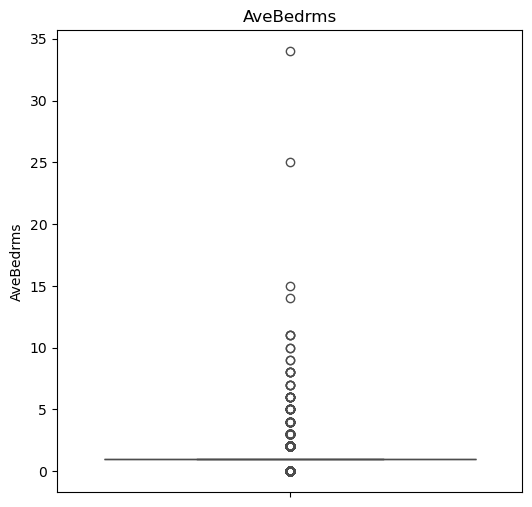

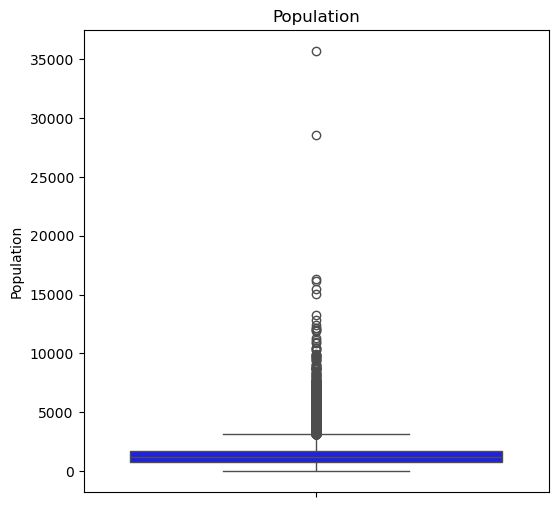

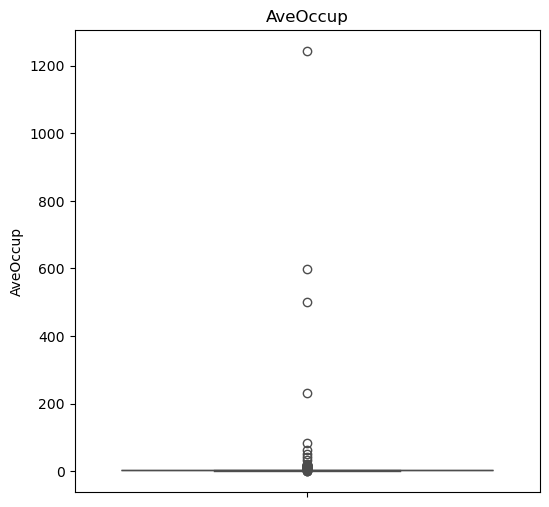

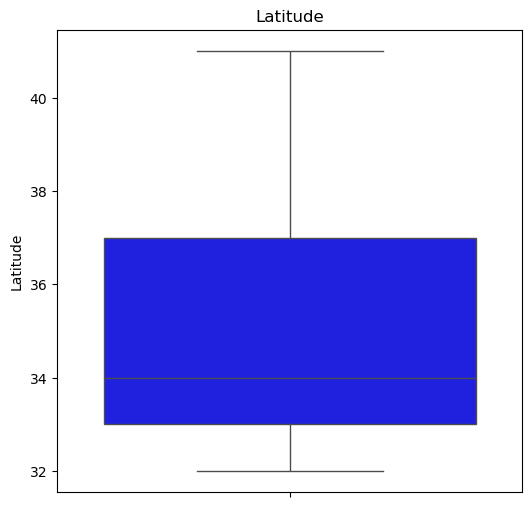

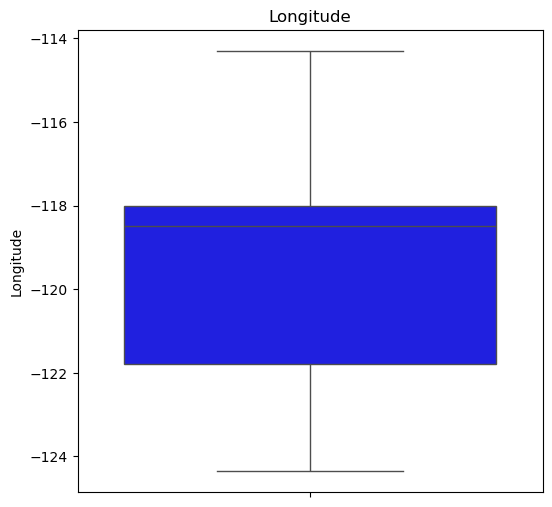

In [24]:
for col in Numerical:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[col],color='blue')
    plt.title(col)
    plt.ylabel(col)
    plt.show()